# Original Multi-step prediction

In [1]:
from init import *
init()
import tensorflow as tf

import os
import pandas as pd
from mll.LSTMPredictor import LSTMPredictor

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)

predictor = LSTMPredictor(df[['p (mbar)', 'T (degC)', 'rho (g/m**3)']], 'T (degC)', 300000, 720, 72, step=6, seed=13)
model = predictor.multi_step_model
history = predictor.multi_step_history

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 18s 91ms/step - loss: 0.4427 - val_loss: 0.2886
Epoch 2/10
200/200 [==============================] - 5s 27ms/step - loss: 0.2816 - val_loss: 0.2278
Epoch 3/10
200/200 [==============================] - 5s 23ms/step - loss: 0.2533 - val_loss: 0.2218
Epoch 4/10
200/200 [==============================] - 6s 28ms/step - loss: 0.2265 - val_loss: 0.2013
Epoch 5/10
200/200 [==============================] - 6s 28ms/step - loss: 0.1928 - val_loss: 0.1929
Epoch 6/10
200/200 [==============================] - 6s 28ms/step - loss: 0.2015 - val_loss: 0.2113
Epoch 7/10
200/200 [==============================] - 6s 29ms/step - loss: 0.1958 - val_loss: 0.1971
Epoch 8/10
200/200 [==============================] - 6s 29ms/step - loss: 0.1910 - val_loss: 0.1898
Epoch 9/10
200/200 [==============================] - 6s 29ms/step - loss: 0.1955 - val_loss: 0.1978
Epoch 10/10
200/200 [==========================

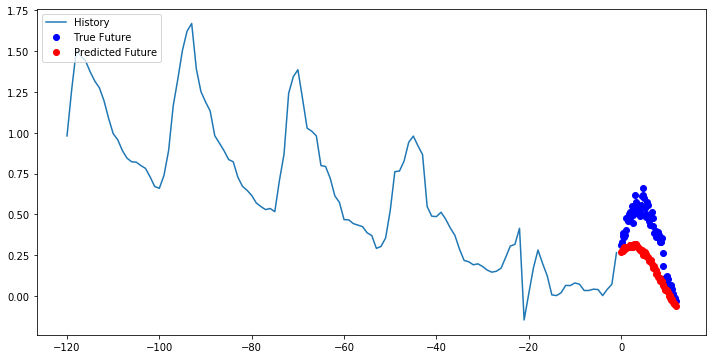

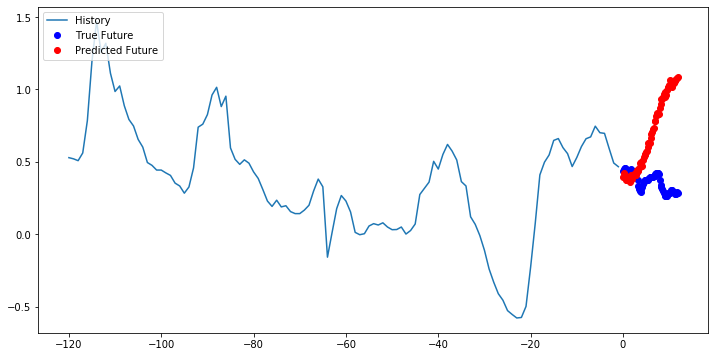

In [3]:
for i, (x, y) in enumerate( predictor.validation_dataset.take(5) ):
    if i > 2:
        multi_step_plot(x[0], y[0], model.predict(x)[0], predictor.step, predictor.dependent_variable)

In [4]:
from utils import plot_df
from ipywidgets import interact, IntSlider
max_count = 20
dfs = predictor.multi_step_dfs(max_count)
fig = plot_df(dfs[0])

@interact(step=IntSlider(min=1, max=max_count, step=1, value=1))
def update(step):
    global dfs
    with fig.batch_update():
        df = dfs[step-1]
        fig.data[0].y = df['True Future'].values
        fig.data[1].y = df['Predicted Future'].values
fig

interactive(children=(IntSlider(value=1, description='step', max=20, min=1), Output()), _dom_classes=('widget-…

FigureWidget({
    'data': [{'name': 'True Future',
              'type': 'scatter',
              'uid': '21d…

# CME & Quandl

In [ ]:
import mll.QuandlFeed as qf
#CME_CL is CME WTI crude oil (38) and CME_NG is Natural Gas (43)
df = qf.get_data({'CHRIS/CME_' + k: k for k in ['CL1', 'CL2', 'CL3', 'CL4', 'CL5','NG1', 'NG2', 'NG3', 'NG4', 'NG5']}
                 , 'Last')
df.plot()

In [ ]:
#df.iloc[1760:][['CL3','NG1','NG2','NG3','NG4','NG5']]
df2 = df[['CL3','NG1','NG2','NG3','NG4','NG5']].dropna()
df2['CL3'] /= 10
df2[0:100].plot()

In [ ]:
df2[df2.NG1.isna()]